In [1]:
import pandas as pd
from PIL import Image
import random

import torch,numpy
import os,re,json
import matplotlib.pyplot as plt
import requests
import re
from torch.utils.data import Dataset

from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import torch
from collections import defaultdict

from datasets import load_dataset

import base64
from PIL import Image
from io import BytesIO


# Convert to DataFrame

In [27]:
# EXTRACT IMAGES FROM NOTEBOOK AND CREATE A DATAFRAME. 
# import pandas as pd
# from openpyxl import load_workbook

# import os
# import base64
# import pandas as pd

# from openpyxl import load_workbook

# import os
# import base64
# import pandas as pd
# from openpyxl import load_workbook
# from openpyxl.drawing.image import Image as XLImage
# from io import BytesIO

# import os
# import base64
# import pandas as pd

# import os
# import base64
# import pandas as pd


# import os
# import pandas as pd
# from openpyxl import load_workbook
# from io import BytesIO
# import os
# import pandas as pd
# from openpyxl import load_workbook

# def get_image_bytes(img):
#     """
#     Returns PNG bytes of an openpyxl image, robust to different types.
#     """
#     from io import BytesIO

#     # Case 1: img has .image (PIL.Image)
#     if hasattr(img, "image"):
#         buf = BytesIO()
#         img.image.save(buf, format="PNG")
#         return buf.getvalue()
    
#     # Case 2: img._data() exists
#     if hasattr(img, "_data"):
#         return img._data()
    
#     # Case 3: img.ref is bytes
#     if hasattr(img, "ref") and isinstance(img.ref, bytes):
#         return img.ref

#     raise ValueError("Cannot extract image bytes from this image object.")

# def extract_images_and_merge_notes(xlsx_path, output_path, image_folder="images"):
#     os.makedirs(image_folder, exist_ok=True)
#     sheets = ['Juan', 'Paul', 'Adam', 'Stella', 'Stephanie']

#     row_to_png = {}  # (row_idx, vis_type) -> png path
#     notes_dict = {}   # row_idx -> {'Notes Vis 1': [], 'Notes Vis 2': []}
#     counters = {'ground_truth': 0, 'selected_vis_1': 0, 'selected_vis_2': 0}
#     seen_images = {}  # img_bytes -> png path

#     wb = load_workbook(xlsx_path, data_only=True)

#     for sheet_name in sheets:
#         ws = wb[sheet_name]

#         # Map column names to letters
#         header = {cell.value: cell.column_letter for cell in ws[1]}
#         col_mapping = {
#             'ground_truth': header.get('Ground Truth Visualization'),
#             'selected_vis_1': header.get('Selected Vis 1'),
#             'selected_vis_2': header.get('Selected Vis 2')
#         }
#         notes_cols = {
#             'Notes Vis 1': header.get('Notes Vis 1'),
#             'Notes Vis 2': header.get('Notes Vis 2')
#         }

#         # Aggregate notes by row
#         for row_idx in range(2, ws.max_row + 1):
#             zero_idx = row_idx - 2
#             if zero_idx not in notes_dict:
#                 notes_dict[zero_idx] = {'Notes Vis 1': [], 'Notes Vis 2': []}

#             for note_key, col_letter in notes_cols.items():
#                 if col_letter:
#                     val = ws[f"{col_letter}{row_idx}"].value
#                     if val is not None:
#                         notes_dict[zero_idx][note_key].append(str(val))

#         # Extract images
#         for img in ws._images:
#             anchor = img.anchor._from
#             row_idx = anchor.row - 1  # zero-based
#             col_idx = anchor.col

#             # Determine vis_type by column
#             vis_type = None
#             for name, col_letter in col_mapping.items():
#                 if col_letter:
#                     col_number = ws[col_letter + str(row_idx + 2)].col_idx - 1
#                     if col_number == col_idx:
#                         vis_type = name
#                         break
#             if vis_type is None:
#                 continue

#             # Get PNG bytes
#             img_bytes = get_image_bytes(img)

#             # Save unique image
#             if img_bytes not in seen_images:
#                 filename = f"{vis_type}_img{counters[vis_type]}.png"
#                 counters[vis_type] += 1
#                 full_path = os.path.join(image_folder, filename)
#                 with open(full_path, "wb") as f:
#                     f.write(img_bytes)
#                 seen_images[img_bytes] = full_path

#             row_to_png[(row_idx, vis_type)] = seen_images[img_bytes]

#     # Build final DataFrame
#     final_rows = []
#     max_row_idx = max([idx for idx, _ in row_to_png.keys()]) if row_to_png else -1
#     for idx in range(max_row_idx + 1):
#         gt = row_to_png.get((idx, 'ground_truth'))
#         vis1 = row_to_png.get((idx, 'selected_vis_1'))
#         vis2 = row_to_png.get((idx, 'selected_vis_2'))

#         if not (gt and vis1 and vis2):
#             continue

#         final_rows.append({
#             'row_index': idx,
#             'ground_truth': gt,
#             'selected_vis_1': vis1,
#             'selected_vis_2': vis2,
#             'Notes Vis 1': notes_dict[idx]['Notes Vis 1'],
#             'Notes Vis 2': notes_dict[idx]['Notes Vis 2']
#         })

#     final_df = pd.DataFrame(final_rows)
#     final_df.to_excel(output_path, index=False)
#     print(f"Saved {len(final_rows)} comparison rows to {output_path}")


# # Run the workflow
# extract_images_and_merge_notes(
#     xlsx_path="astro_vis_eval.xlsx",
#     output_path="astro_vis_eval_final.xlsx",
#     image_folder="images"
# )



### Extra ChatGPT written function to correct leaving out the visualization query

# import pandas as pd
# import pandas as pd
# from pathlib import Path

# raw_path = "astro_vis_eval.xlsx"
# final_path = "astro_vis_eval_final.xlsx"
# out_path = "astro_vis_eval_final_with_queries.xlsx"

# # --- load ---
# df_raw = pd.read_excel(raw_path)
# df_final = pd.read_excel(final_path)

# # --- find visualization column robustly ---
# def find_vis_col(df):
#     for c in df.columns:
#         s = str(c).lower()
#         if 'visual' in s and 'query' in s:
#             return c
#     for c in df.columns:
#         s = str(c).lower()
#         if 'visual' in s or 'query' in s:
#             return c
#     raise KeyError("Couldn't find a 'Visualization Query' column. Columns: " + ", ".join(map(str, df.columns)))

# vis_col = find_vis_col(df_raw)
# print("Using visualization column:", vis_col)

# # --- prepare orig_index (pandas data-row index) ---
# df_raw = df_raw.copy()
# df_raw['orig_index'] = df_raw.index.astype(int)   # 0-based pandas data-row index

# # --- try several offsets and pick the best by number of non-null merges ---
# candidates = [-2, -1, 0, 1, 2]   # you can expand if desired
# best_offset = None
# best_count = -1
# best_merged = None
# counts = {}

# for offset in candidates:
#     df_raw['row_index'] = (df_raw['orig_index'] + offset).astype('Int64')
#     # prepare queries DF
#     df_queries = df_raw[['row_index', vis_col]].rename(columns={vis_col: 'Visualization Query'})
#     # merge
#     merged = df_final.merge(df_queries, on='row_index', how='left')
#     matched = merged['Visualization Query'].notna().sum()
#     counts[offset] = matched
#     print(f"offset {offset:>2}: matched {matched} rows")
#     # tie-break: prefer larger matched, then smaller absolute offset
#     if (matched > best_count) or (matched == best_count and (best_offset is None or abs(offset) < abs(best_offset))):
#         best_count = matched
#         best_offset = offset
#         best_merged = merged.copy()



Saved 41 comparison rows to astro_vis_eval_final.xlsx


# Get VLM Feedback.

In [1]:
import pandas as pd


# Standard VLM Loops
from transformers import AutoProcessor, LlavaForConditionalGeneration, BitsAndBytesConfig
from transformers import (
    AutoProcessor, AutoModelForCausalLM, BitsAndBytesConfig,
    LlavaForConditionalGeneration, LlavaNextProcessor,GenerationConfig,
    LlavaNextForConditionalGeneration, Qwen2VLForConditionalGeneration,AutoModel, AutoTokenizer
)
from PIL import Image
import torch
import pandas as pd
import re
from collections import defaultdict
import numpy as np
from sklearn.metrics import accuracy_score

from PIL import Image
import matplotlib.pyplot as plt
import random

from transformers import AutoProcessor, LlavaForConditionalGeneration, BitsAndBytesConfig

# JANUS IMPORTS
from janus.models import MultiModalityCausalLM, VLChatProcessor
from janus.utils.io import load_pil_images
import base64

import argparse
import os
import pickle
import gc

from collections import defaultdict
from qwen_vl_utils import process_vision_info

from datasets import load_dataset
import io

import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

### STEP 1

# Import cleaned DF. 
# Columns: row idx (idx in the excell), ground truth (img path for GT), selected_vis_1 (img path), 
# selected_vis_2 (img path), Notes Vis 1 (list of all annotator comments for vis 1),
# Notes Vis 2 (list of all annotator comments for vis 2)

df=pd.read_excel("astro_vis_eval_merged.xlsx", engine="openpyxl")


### STEP 2 Load Model 
model_version='llava-next'


bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

if model_version == 'llava-next':
    processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
    model = LlavaNextForConditionalGeneration.from_pretrained(
        "llava-hf/llava-v1.6-mistral-7b-hf", quantization_config=bnb_config, torch_dtype=torch.float16, low_cpu_mem_usage=True
    )
    
elif model_version == 'janus':
    model_path = "deepseek-ai/Janus-Pro-7B"
    processor: VLChatProcessor = VLChatProcessor.from_pretrained(model_path)
    model: MultiModalityCausalLM = AutoModelForCausalLM.from_pretrained(
        model_path, trust_remote_code=True
    )
    model = model.to(torch.bfloat16).cuda().eval()

elif model_version == 'qwen':
    processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")
    model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", torch_dtype=torch.bfloat16, device_map="auto"
    )
    model.eval()
    model = model.to(torch.bfloat16).cuda().eval()





Python version is above 3.10, patching the collections module.


/users/wrudman/counterfact_env/lib/python3.11/site-packages/transformers/models/auto/image_processing_auto.py:625: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [2]:

def clean_janus_answer(text):
    pattern = r"<\|Assistant\|>:\s?(.*?)(?=<｜end▁of▁sentence｜>)"
    match = re.search(pattern, text)
    return match.group(1).strip('.')

def clean_instruction_tokens(text):
    cleaned_text = re.sub(r'\[INST\]\s*\n?.*?\[/INST\]\s*', '', text, flags=re.DOTALL)
    return cleaned_text.strip()

def mllm_testing(df, processor, model, model_name, image_type):
    with torch.inference_mode():
        torch.cuda.empty_cache()
        gc.collect()
        generated_texts = []
        for idx, row in df.iterrows():
    
            if model_name == 'llava-next':
                instruction_tokens = "[INST] <image>\n"
                end_tokens = "[/INST]"
            else:
                instruction_tokens=''
                end_tokens=''

            # options: ground_truth, selected_vis_1, selected_vis_2	
            image_path = row[image_type]
            
            visualization_query = row["Visualization Query"]
            #prompt = f"{instruction_tokens} You will provided with a visualization query and an image. Act as a helpful critic and provide detailed feedback on whether the given image matches the query description and what needs to be improved in the visualization. {visualization_query} {end_tokens}"    
            prompt = f"{instruction_tokens} You will be provided with a query intended to generate a plot. Provide critical feedback on plot. Examine legends, axis, labels and subplots. List any corrections needed to improve the image. QUERY: {visualization_query}. {end_tokens}"        
            try:
                image = Image.open(image_path).convert("RGB")
                image = image.resize((256, 256), Image.LANCZOS)
            except FileNotFoundError:
                print(f"Warning: Image not found for {row['object']}")
                generated_texts.append(None)
                continue  # Skip to the next row in the DataFrame

            if model_name == "janus": 
                 with open(image_path, "rb") as f:
                     image_bytes = f.read()

                 # Encode to base64
                 image_data = base64.b64encode(image_bytes).decode("utf-8")
                
                 # Build data URI (use correct MIME type)
                 if image_path.lower().endswith(".png"):
                     mime_type = "image/png"
                 else:
                     mime_type = "image/jpeg"
                
                 image = f"data:{mime_type};base64,{image_data}"
                    
                                    
                 conversation = [
                     {
                         "role": "<|User|>",
                         "content": f"<image_placeholder>\n{prompt}",
                         "images": [image],
                     },
                     {"role": "<|Assistant|>", "content": ""},
                 ]
    
                 # load images and prepare for inputs
                 pil_images = load_pil_images(conversation)
    
                 prepare_inputs = processor(
                    conversations=conversation, images=pil_images, force_batchify=True
                 ).to(model.device)
    
                 # # run image encoder to get the image embeddings
                 inputs_embeds = model.prepare_inputs_embeds(**prepare_inputs)
                 tokenizer = processor.tokenizer
    
                 # removing 'generate' for now. 
                 outputs = model.language_model.generate(
                    inputs_embeds=inputs_embeds,
                    attention_mask=prepare_inputs.attention_mask,
                    pad_token_id=tokenizer.eos_token_id,
                    bos_token_id=tokenizer.bos_token_id,
                    eos_token_id=tokenizer.eos_token_id,
                    max_new_tokens=256,
                    num_beams=1,
                    do_sample=False,
                    use_cache=True,
                    temperature=1.0,
                 )
                 predicted_answer = processor.tokenizer.decode(outputs[0].cpu().tolist(), skip_special_tokens=True)
                
            elif model_name == 'llava-next':   
                inputs = processor(images=image, text=prompt, return_tensors='pt')
                inputs = {k: v.to('cuda') for k, v in inputs.items()} 
                # Perform a forward pass with the model
                outputs = model.generate(**inputs, max_new_tokens=256, num_beams=1, do_sample=False, temperature=1.0)  # Adjust max_new_tokens as needed
                predicted_answer = processor.tokenizer.decode(outputs[0], skip_special_tokens=True)
                predicted_answer = clean_instruction_tokens(predicted_answer)
                
            elif model_name == 'qwen':
                pil_img = Image.open(io.BytesIO(image_path)).convert("RGB") 
                pil_img = pil_img.resize((224, 224), Image.LANCZOS)
                
                messages = [{
                    "role": "user",
                    "content": [
                        {"type": "image", "image": pil_img},  # Pass resized image object
                        {"type": "text", "text": prompt},
                    ],
                }]
 
    
                text = processor.apply_chat_template(
                    messages, tokenize=False, add_generation_prompt=True
                )
    
                image_inputs, video_inputs = process_vision_info(messages)
    
                inputs = processor(
                    text=[text],
                    images=image_inputs,
                    videos=video_inputs,
                    padding=True,
                    return_tensors="pt",
                )
    
                for k, v in inputs.items():
                    if torch.is_tensor(v):
                        inputs[k] = v.to("cuda", non_blocking=True)
    
                generated_ids = model.generate(
                    **inputs,
                    max_new_tokens=256,
                    do_sample=False,
                    use_cache=False
                )
    
                generated_ids_trimmed = [
                    out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs["input_ids"], generated_ids)
                ]
    
                output_text = processor.batch_decode(
                    generated_ids_trimmed,
                    skip_special_tokens=True,
                    clean_up_tokenization_spaces=False
                )
    
                predicted_answer = output_text[0]
    
                # Explicit cleanup
                del image_inputs, video_inputs, inputs, generated_ids
                #model.cpu()
                torch.cuda.empty_cache()
                gc.collect()           

            #print(predicted_answer)
            print(idx)
            print("-----------------------------------------------------------------------")
            
            generated_texts.append(predicted_answer)
    
        #df[f'{model_name}_generated_text'] = generated_texts
    
        if 'inputs' in locals(): del inputs
        if 'image' in locals(): del image
        torch.cuda.empty_cache()
        torch.cuda.ipc_collect()
        gc.collect()
    return generated_texts

In [3]:
df=pd.read_excel("astro_vis_eval_merged.xlsx", engine="openpyxl")

In [5]:
# This pipeline works to generate feedback. 
# maybe add a chart model. 
# Do we want to assume access to the GT knowledge? Probably not.... 
split="selected_vis_2"
generated_texts = mllm_testing(df, processor, model, model_version, split)

generated_df = pd.DataFrame(generated_texts, columns=["generated_texts"])
generated_df.to_csv(f"{model_version}_{split}_feedback.csv", index=False)


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


1
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


2
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


3
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


4
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


5
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


6
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


7
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


8
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


9
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


10
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


11
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


12
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


13
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


14
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


15
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


16
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


17
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


18
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


19
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


20
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


21
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


22
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


23
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


24
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


25
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


26
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


27
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


28
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


29
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


30
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


31
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


32
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


33
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


34
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


35
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


36
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


37
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


38
-----------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


39
-----------------------------------------------------------------------
40
-----------------------------------------------------------------------


In [64]:
idx=4
generated_texts[1][idx]

'The query provided seems to be well-structured and covers the necessary aspects for creating a comparative visualization of the pre-processed near-infrared data. However, there are a few points that could be improved or considered for better clarity and informational content:\n\n1. **Axis Labels**: The x and y axes should be labeled with the celestial coordinates (e.g., RA and Dec) to provide a clear understanding of the positioning of the objects in the images.\n\n2. **Title and Subtitle**: The titles and subtitles of the subplots should be informative and descriptive. For example, the title of the first subplot could be "Composite Image (Short Wavelength Channel)" and the title of the second subplot could be "Composite Image (Long Wavelength Channel)".\n\n3. **Colorbar**: A colorbar should be included in each subplot to explain the color scale and provide a reference for the viewer to understand the intensity or temperature values represented in the images.\n\n4. **Scale Bar**: A sc

In [65]:
df['Visualization Query'].to_list()[idx]


"\n## Visualization\n\nLet's craft a comparative visualization of the pre-processed near-infrared data. Create a plot with two side-by-side subplots representing the short and long wavelength channels of the NIRCam images. Each subplot should use a world coordinate system projection for accurate celestial positioning, sharing both the x and y axes. The first subplot should display the composite image from the short wavelength channel, labeling the axes to represent celestial coordinates and titling it accordingly. The second subplot should do the same for the long wavelength channel. The goal is to clearly showcase the differences between these two wavelength composites, maximizing both visual clarity and informational content.\n"

In [66]:
df['Notes Vis 2'].to_list()[idx]

'[\'There is code and a plot, but both are fully incorrect.\', "Code looks like it starts out doing the right thing but then does a whole bunch of other stuff that wasn\'t reqeusted and final displayed figure is something completely different.", "doesn\'t look like what\'s the request from prompt. "]'

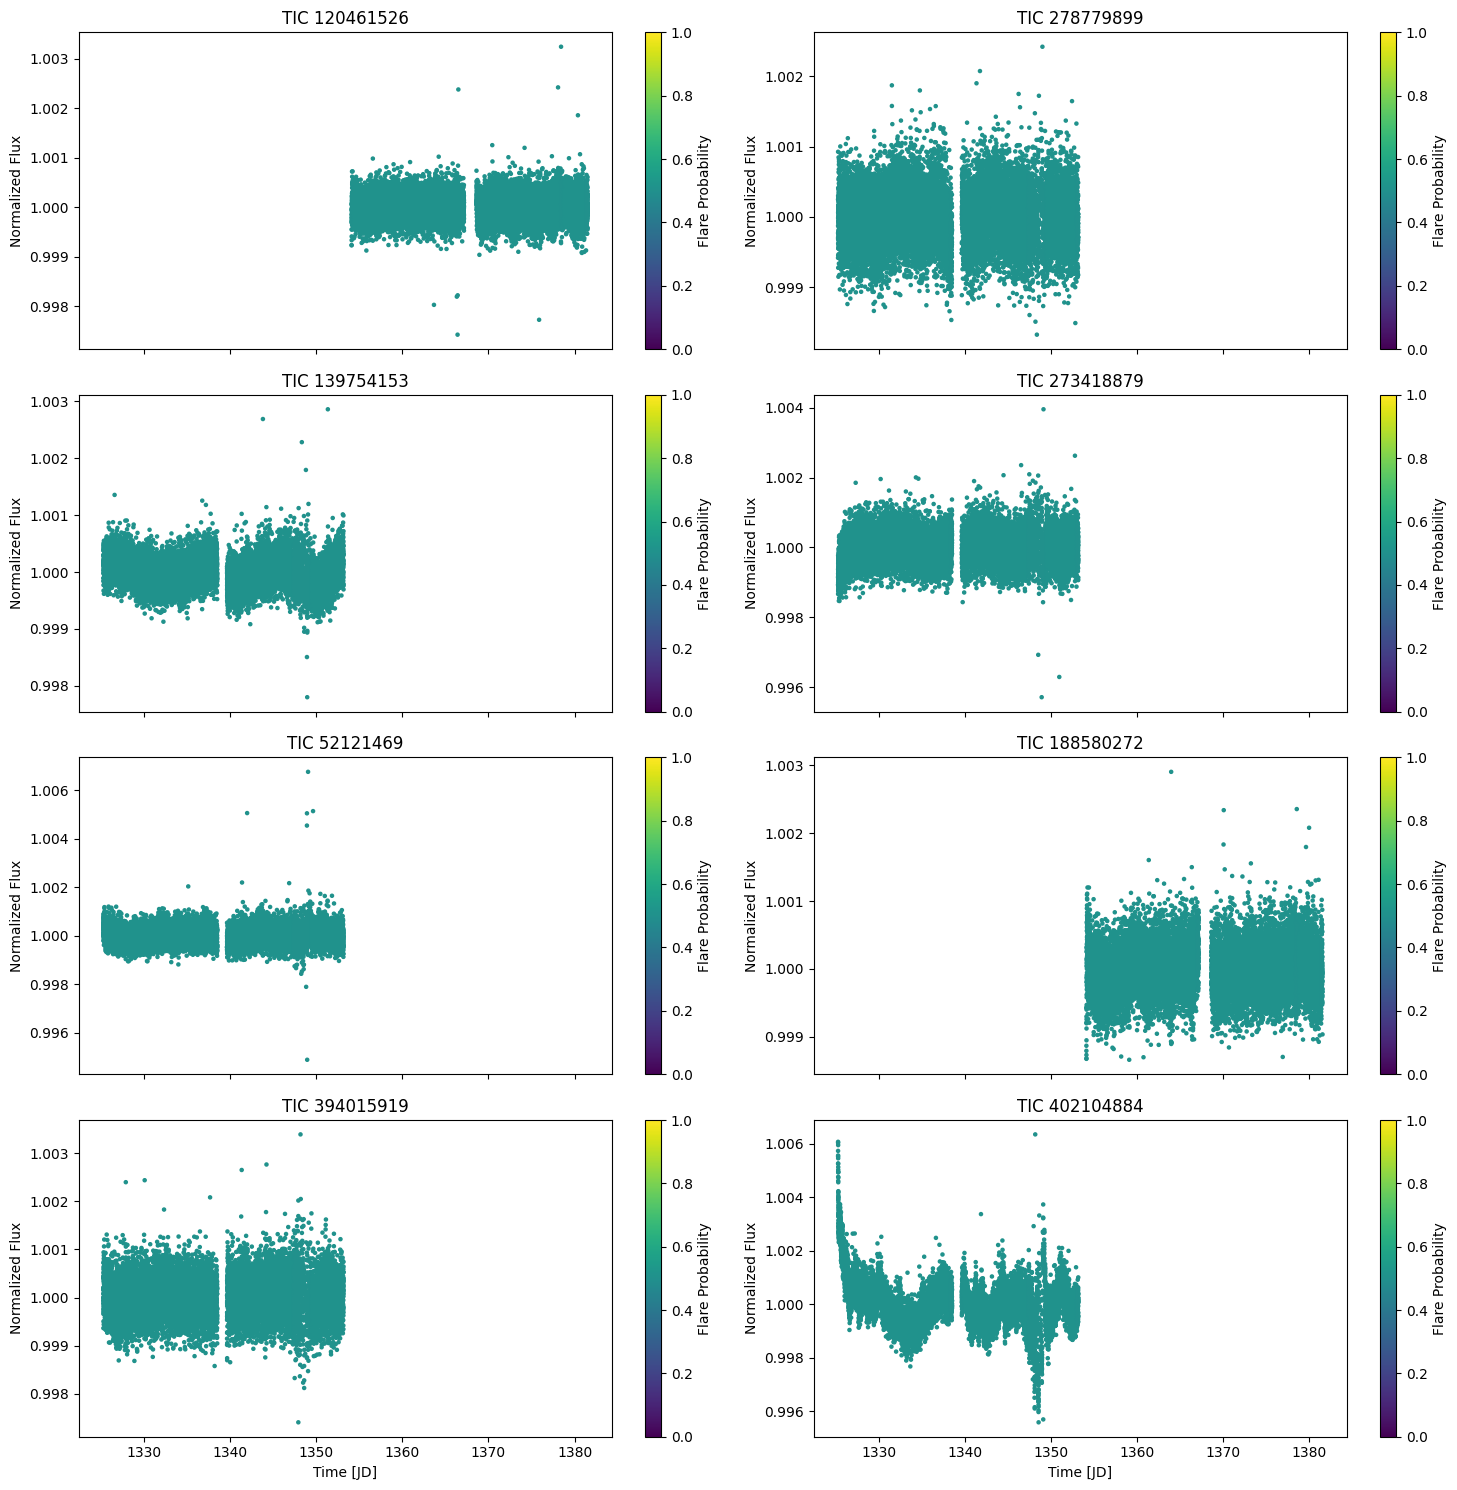

In [30]:
Image.open(df['selected_vis_2'].to_list()[idx])

In [33]:
df

,row_index,ground_truth,selected_vis_1,selected_vis_2,Notes Vis 1,Notes Vis 2,Visualization Query
0,0,images/ground_truth_img0.png,images/selected_vis_1_img0.png,images/selected_vis_2_img0.png,"[""It would be nice to see more than one exampl...","['One blank panel', ""Similar comments to Vis 1...",\n# Visualization Section\n\nConcentrate on vi...
1,1,images/ground_truth_img1.png,images/selected_vis_1_img1.png,images/selected_vis_2_img1.png,['I was about to place minor error for using a...,"[""Doesn't include x-axis (time) label, and som...",\n### Visualization\n\nNow our aim is generati...


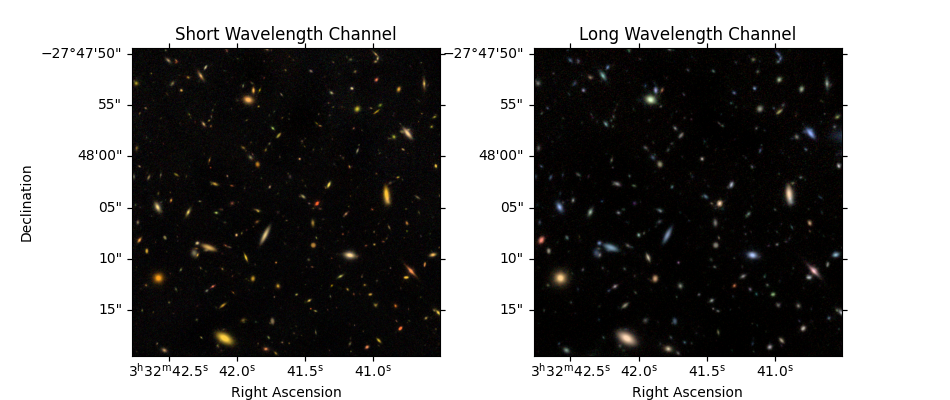

In [67]:
Image.open(df['ground_truth'].to_list()[idx])

In [46]:
idx_to_test=[4]

row_index                                                              4
ground_truth                                images/ground_truth_img4.png
selected_vis_1                            images/selected_vis_1_img4.png
selected_vis_2                            images/selected_vis_2_img4.png
Notes Vis 1             ['Looks great!', 'Font is small', 'Looks good.']
Notes Vis 2            ['There is code and a plot, but both are fully...
Visualization Query    \n## Visualization\n\nLet's craft a comparativ...
Name: 4, dtype: object

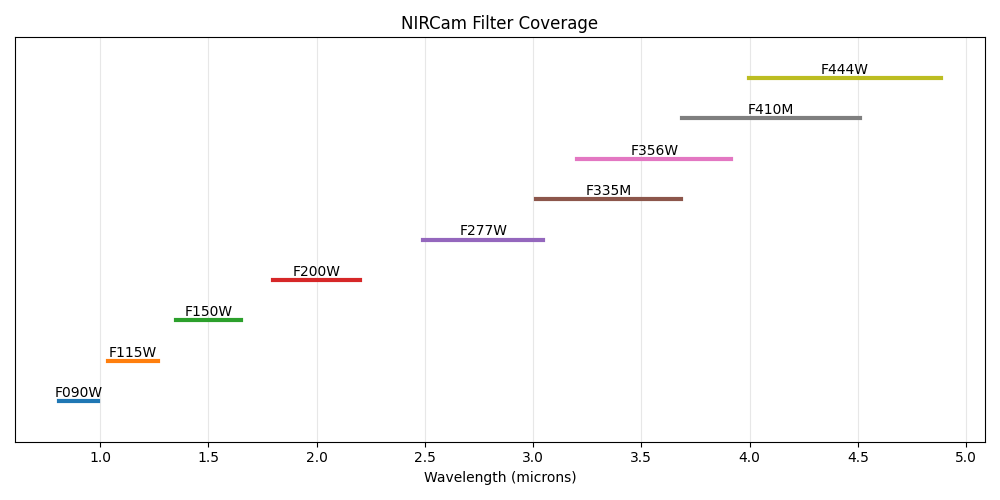

In [45]:
idx=4
Image.open(df['selected_vis_2'].to_list()[idx])

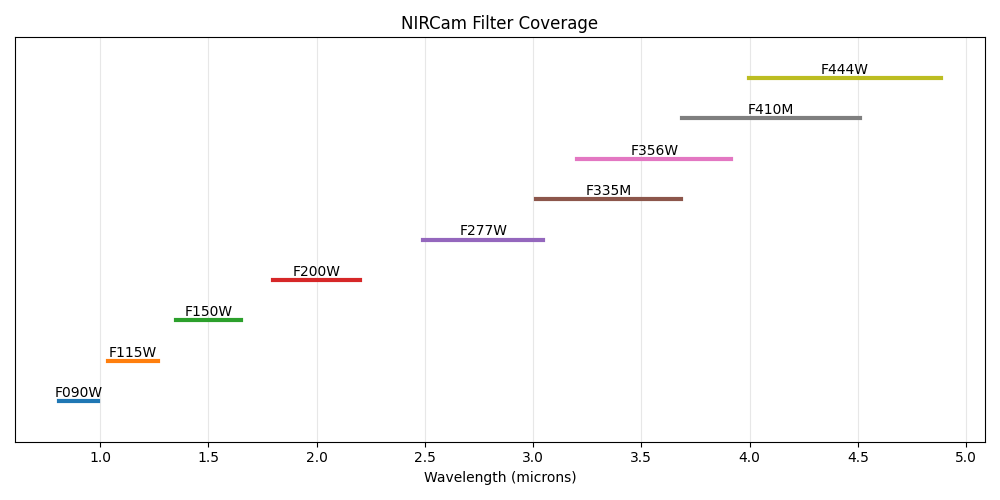

In [52]:
Image.open(df.iloc[4]['selected_vis_2'])

In [54]:
df.iloc[4]['Notes Vis 2']

'[\'There is code and a plot, but both are fully incorrect.\', "Code looks like it starts out doing the right thing but then does a whole bunch of other stuff that wasn\'t reqeusted and final displayed figure is something completely different.", "doesn\'t look like what\'s the request from prompt. "]'

In [56]:
df.head(3:4)

SyntaxError: invalid syntax (952161819.py, line 1)